# Deutsch-Joza Algorithm 

In [10]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

from qiskit_aer import *
from qiskit.providers.aer import *
from qiskit_aer.noise import NoiseModel

## Put your inputs below


In [11]:
# provide your inputs here

number_of_qubits = 4
type_of_oracle = 'b' # 'b' for balanced 'c' for constant


## Code starts here

In [12]:
provider = IBMQ.load_account()



ibmqfactory.load_account:WARNING:2022-11-07 02:54:16,010: Credentials are already in use. The existing account in the session will be replaced.


In [13]:
# The oracle is defined below
def dj_oracle(n:int, type:str):
    #define a quantum circuit with n +1 qubits(1 ancillary)
    _circuit_oracle = QuantumCircuit(n+1)

    #create an oracle based on whether balanced or constant function
    if(type == 'b'):
        _circuit_oracle.x(0)
        _circuit_oracle.cx(0,n)
    elif(type == 'c'):
        #apply identity on the n+1 bit
        _circuit_oracle.i(n)
    else:
        # raise exception if type of function is not 'b' or 'c'
        raise Exception("type can only be b (balanced) or c (constant)")

    #convert to gate
    _gate_oracle = _circuit_oracle.to_gate()
    if (type == 'b'):
        _gate_oracle.name = "oracle_balanced"
    else:
        _gate_oracle.name = "oracle_constant"

    # return the gate
    return _gate_oracle




In [14]:
# circuit function for DJ algorithm
def dj_circuit(n, type):

    _circuit_output = QuantumCircuit(n+1,n)

    #initialize n+1 th helper qubit to 1
    _circuit_output.x(n)
    _circuit_output.barrier()


    #apply hadamards to 0 to n qubits
    for _qubit in range(n+1):
        _circuit_output.h(_qubit)

    #create oracle for this implemnetation of DJ algorithm
    _oracle_gate = dj_oracle(n, type)

    #apply oracle gate on the n+1 qubits
    _circuit_output.append(_oracle_gate,range(n+1))

    # apply hadamard again on the 0 to n-1 qubits
    for _qubit in range(n):
        _circuit_output.h(_qubit)

    _circuit_output.barrier()

    #measure the qubits
    for _bit in range(n):
        _qubit = _bit
        _circuit_output.measure(_qubit,_bit)
    
    #return the output circuit
    return _circuit_output



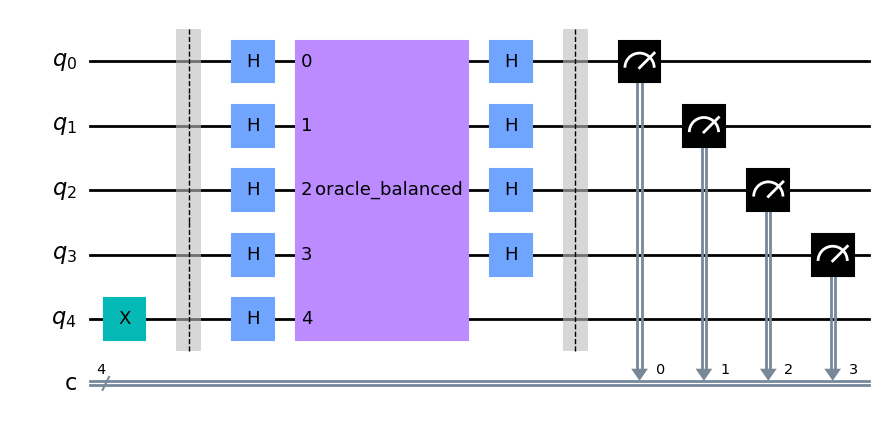

In [15]:
# Test environment


test_circuit = dj_circuit(number_of_qubits, type_of_oracle)

#draw the circuit
test_circuit.draw('mpl')


noisless simulation time taken: 0.002385854721069336


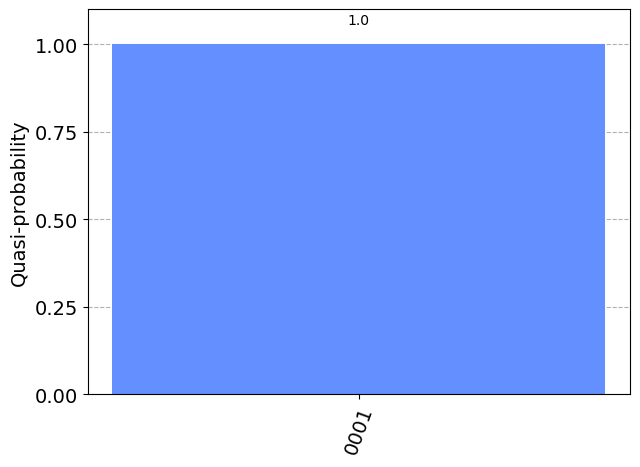

In [16]:
# noiseless simulation

#set backend
backend_sim = Aer.get_backend('qasm_simulator')
#transpile
job_sim = backend_sim.run(transpile(test_circuit, backend_sim), shots=1024)
#get result
result_sim = job_sim.result()
#get counts
counts = result_sim.get_counts(test_circuit)
#print execution time
print("noisless simulation time taken: "+ str(result_sim.time_taken))
total = sum(counts.values())
#convert count to probability
counts = {key: value / total for key, value in counts.items()}
#plot histogram
plot_histogram(counts)

Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067148 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067183 > 1.066667). Truncating to maximum value.


noisy simulation time taken: 0.032868146896362305


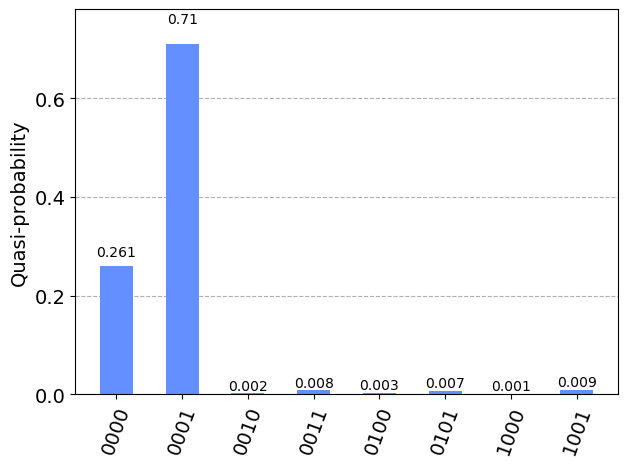

In [17]:
#noisy simulation
# set backend model with belem
noise_model = NoiseModel.from_backend(provider.get_backend('ibmq_belem'))
#define noise of basis gates
basis_gates = noise_model.basis_gates
#execute on backend
result = execute(test_circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

#get counts
counts = result.get_counts(0)
total = sum(counts.values())
#convert count to probability
counts = {key: value / total for key, value in counts.items()}
#print execution time
print("noisy simulation time taken: "+ str(result.time_taken))
#plot histogram
plot_histogram(counts)

noisy simulation time taken: 0.02479720115661621


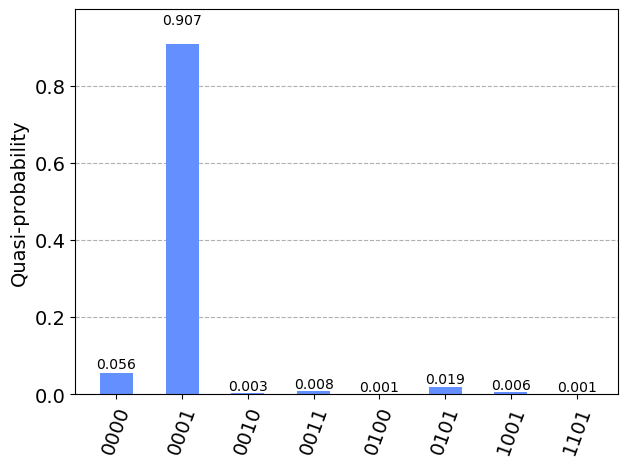

In [18]:
#noisy simulation
# set backend model with manila
noise_model = NoiseModel.from_backend(provider.get_backend('ibmq_manila'))
#define noise of basis gates
basis_gates = noise_model.basis_gates
#execute on backend
result = execute(test_circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

#get counts
counts = result.get_counts(0)
total = sum(counts.values())
#convert count to probability
counts = {key: value / total for key, value in counts.items()}
#print execution time
print("noisy simulation time taken: "+ str(result.time_taken))
#plot histogram
plot_histogram(counts)